In [2]:
import os
import sys
import datetime as dt

import numpy as np
import pandas as pd
from scipy import stats, constants
from scipy.special import comb, perm, factorial, expit
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
fp_list_master = ['C:', 'Users', 'szahn', 'Dropbox', 'Statistics & Machine Learning', 'coursera_ml_notes']
fp = os.sep.join(fp_list_master)
fp_fig = fp + os.sep + 'LaTeX Notes' + os.sep + 'Figures'
print(os.path.isdir(fp), os.path.isdir(fp_fig))

True True


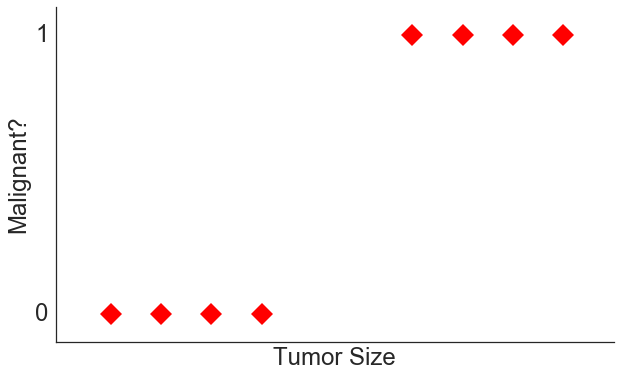

In [48]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(-0.1, 11)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor.pdf')

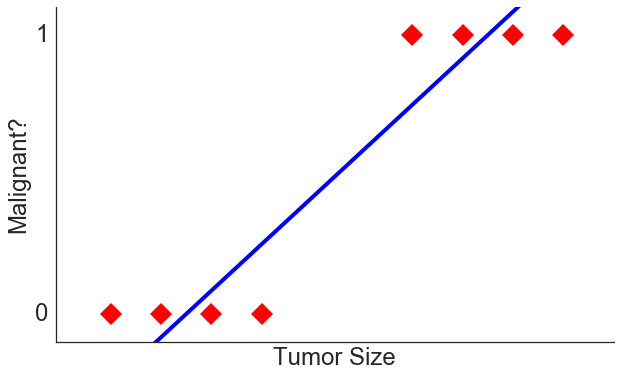

In [51]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

x_list_reg = list(range(11))
regline = lambda x: (1/6) * (x - 1) - 0.25
y_list_reg = [regline(x) for x in x_list_reg]

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(-0.1, 11)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1.pdf')

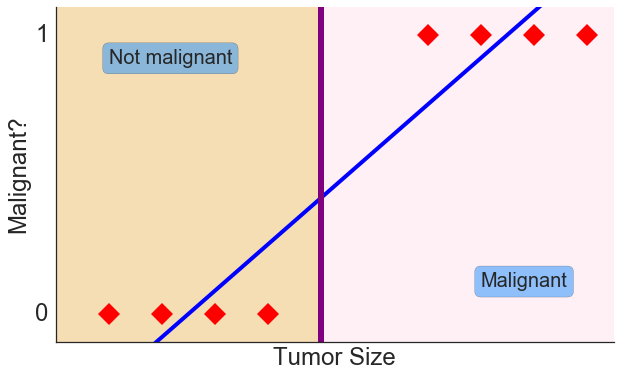

In [87]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10]
y_list = [0, 0, 0, 0, 1, 1, 1, 1]

x_list_reg = list(range(11))
regline = lambda x: (1/6) * (x - 1) - 0.25
y_list_reg = [regline(x) for x in x_list_reg]

textstr1 = 'Not malignant'
textstr2 = 'Malignant'
props = dict(boxstyle='round', facecolor='dodgerblue', alpha=0.5)

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(0, 10.5)
    
    plt.axvline(x=5, color='purple', linewidth=6)
    plt.axvspan(0, 5, color='wheat')
    plt.axvspan(5, 11, color='lavenderblush')
    
    ax.text(1, 0.95, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    ax.text(8, 0.15, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1_threshold.pdf')

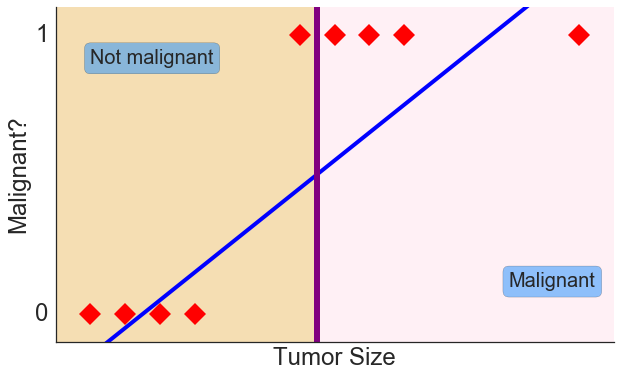

In [104]:
x_list = [1, 2, 3, 4, 7, 8, 9, 10, 15]
y_list = [0, 0, 0, 0, 1, 1, 1, 1, 1]

x_list_reg = list(range(16))
regline = lambda x: (1/10) * x - 0.25
y_list_reg = [regline(x) for x in x_list_reg]


textstr1 = 'Not malignant'
textstr2 = 'Malignant'
props = dict(boxstyle='round', facecolor='dodgerblue', alpha=0.5)

with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'rD', markersize=16)
    plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("Tumor Size", fontsize=24)
    plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1], fontsize=24)
    plt.xticks([])
    plt.ylim(-0.10, 1.10)
    plt.xlim(0, 16)
    
    plt.axvline(x=7.5, color='purple', linewidth=6)
    plt.axvspan(0, 7.5, color='wheat')
    plt.axvspan(7.5, 16, color='lavenderblush')
    
    ax.text(1, 0.95, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    ax.text(13, 0.15, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg1_maltumor_linreg1_newpoint.pdf')

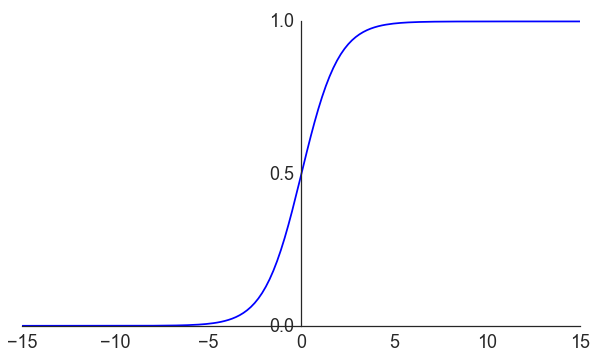

In [140]:
x_list = np.linspace(-15, 15, 150)
y_list = expit(x_list)


with sns.axes_style('white'):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x_list, y_list, 'b')
    plt.xlim(-15, 15)
    plt.ylim(-0.05, 1.05)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.yticks([0, 0.5, 1], fontsize=18)
    plt.xticks(fontsize=18)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg2_sigmoid_func_plot.pdf')

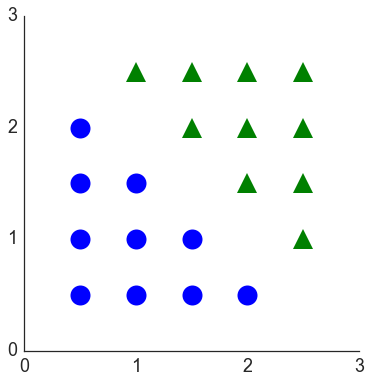

In [34]:
x_list1 = [0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1.5, 1.5, 2]
y_list1 = [0.5, 1, 1.5, 2, 0.5, 1, 1.5, 0.5, 1, 0.5]

x_list2 = [2.5, 2.5, 2.5, 2.5, 2, 1.5, 1, 2, 1.5, 2]
y_list2 = [1, 1.5, 2, 2.5, 2.5, 2.5, 2.5, 2, 2, 1.5]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x_list1, y_list1, 'bo', markersize=20)
    plt.plot(x_list2, y_list2, 'g^', markersize=20)
    
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    #plt.xlabel("Tumor Size", fontsize=24)
    #plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1, 2, 3], fontsize=18)
    plt.xticks([0, 1, 2, 3], fontsize=18)
    plt.ylim(0, 3)
    plt.xlim(0, 3)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg3_decision_bndy_noline.pdf')

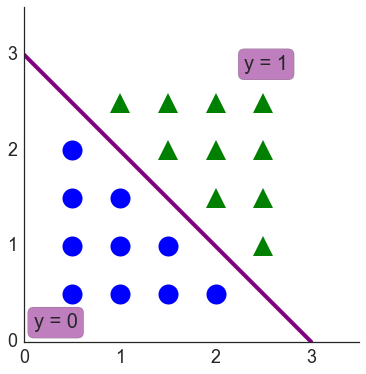

In [51]:
x_list1 = [0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1.5, 1.5, 2]
y_list1 = [0.5, 1, 1.5, 2, 0.5, 1, 1.5, 0.5, 1, 0.5]

x_list2 = [2.5, 2.5, 2.5, 2.5, 2, 1.5, 1, 2, 1.5, 2]
y_list2 = [1, 1.5, 2, 2.5, 2.5, 2.5, 2.5, 2, 2, 1.5]

x_list3 = np.linspace(0, 3, 50)
y_list3 = x_list3[::-1]

textstr1 = 'y = 0'
textstr2 = 'y = 1'
props = dict(boxstyle='round', facecolor='purple', alpha=0.5)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x_list1, y_list1, 'bo', markersize=20)
    plt.plot(x_list2, y_list2, 'g^', markersize=20)
    plt.plot(x_list3, y_list3, '-', color='purple', linewidth=4)
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    #plt.xlabel("Tumor Size", fontsize=24)
    #plt.ylabel('Malignant?', fontsize=24)
    plt.yticks([0, 1, 2, 3], fontsize=18)
    plt.xticks([0, 1, 2, 3], fontsize=18)
    plt.ylim(0, 3.5)
    plt.xlim(0, 3.5)
    
    ax.text(0.1, 0.3, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    ax.text(2.3, 3, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg3_decision_bndy_withline.pdf')

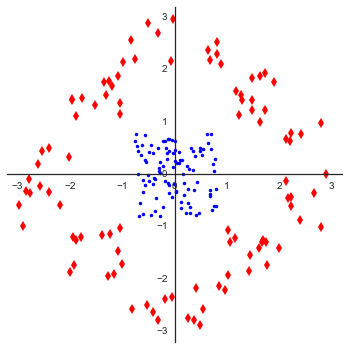

In [81]:
x_list1 = np.random.uniform(low=-0.8, high=0.8, size=100)
y_list1 = np.random.uniform(low=-0.8, high=0.8, size=100)

x_partial_1 = np.random.uniform(-1, 1, 25)
y_partial_1 = np.random.uniform(2, 3, 12)
y_partial_2 = np.random.uniform(-3, -2, 13)
x_partial_2 = np.random.uniform(2, 3, 13)
x_partial_3 = np.random.uniform(-3, -2, 12)
y_partial_3 = np.random.uniform(-1, 1, 25)
x_partial_4 = np.random.uniform(1, 2, 12)
y_partial_4 = np.random.uniform(1, 2, 12)
x_partial_5 = np.random.uniform(-2, -1, 12)
y_partial_5 = np.random.uniform(1, 2, 12)
x_partial_6 = np.random.uniform(1, 2, 12)
y_partial_6 = np.random.uniform(-2, -1, 12)
x_partial_7 = np.random.uniform(-2, -1, 12)
y_partial_7 = np.random.uniform(-2, -1, 12)

x_list2 = np.concatenate([x_partial_1, x_partial_2, x_partial_3, x_partial_4, x_partial_5, x_partial_6, x_partial_7], 0)
y_list2 = np.concatenate([y_partial_1, y_partial_2, y_partial_3, y_partial_4, y_partial_5, y_partial_6, y_partial_7], 0)

textstr1 = 'y = 0'
textstr2 = 'y = 1'
props = dict(boxstyle='round', facecolor='purple', alpha=0.5)
circle = plt.Circle((0, 0), 1.3, color='purple', fill=False, linewidth=4)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x_list1, y_list1, 'b.')
    plt.plot(x_list2, y_list2, 'rd')
    #plt.plot(x_list3, y_list3, '-', color='purple', linewidth=4)
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    #plt.xlabel("Tumor Size", fontsize=24)
    #plt.ylabel('Malignant?', fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(-3.2, 3.2)
    plt.xlim(-3.2, 3.2)
    
    #ax.add_artist(circle)
    
    #ax.text(0.1, 0.3, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    #ax.text(2.3, 3, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_smart_bounds(True)
    #ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg3_decision_bndy_nonlinear_nocirc.pdf')

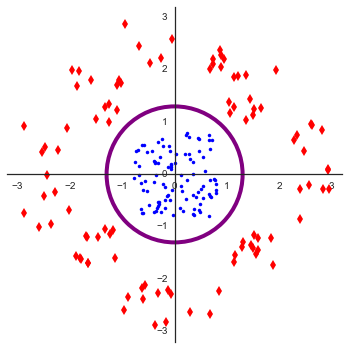

In [82]:
x_list1 = np.random.uniform(low=-0.8, high=0.8, size=100)
y_list1 = np.random.uniform(low=-0.8, high=0.8, size=100)

x_partial_1 = np.random.uniform(-1, 1, 25)
y_partial_1 = np.random.uniform(2, 3, 12)
y_partial_2 = np.random.uniform(-3, -2, 13)
x_partial_2 = np.random.uniform(2, 3, 13)
x_partial_3 = np.random.uniform(-3, -2, 12)
y_partial_3 = np.random.uniform(-1, 1, 25)
x_partial_4 = np.random.uniform(1, 2, 12)
y_partial_4 = np.random.uniform(1, 2, 12)
x_partial_5 = np.random.uniform(-2, -1, 12)
y_partial_5 = np.random.uniform(1, 2, 12)
x_partial_6 = np.random.uniform(1, 2, 12)
y_partial_6 = np.random.uniform(-2, -1, 12)
x_partial_7 = np.random.uniform(-2, -1, 12)
y_partial_7 = np.random.uniform(-2, -1, 12)

x_list2 = np.concatenate([x_partial_1, x_partial_2, x_partial_3, x_partial_4, x_partial_5, x_partial_6, x_partial_7], 0)
y_list2 = np.concatenate([y_partial_1, y_partial_2, y_partial_3, y_partial_4, y_partial_5, y_partial_6, y_partial_7], 0)

textstr1 = 'y = 0'
textstr2 = 'y = 1'
props = dict(boxstyle='round', facecolor='purple', alpha=0.5)
circle = plt.Circle((0, 0), 1.3, color='purple', fill=False, linewidth=4)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x_list1, y_list1, 'b.')
    plt.plot(x_list2, y_list2, 'rd')
    #plt.plot(x_list3, y_list3, '-', color='purple', linewidth=4)
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    #plt.xlabel("Tumor Size", fontsize=24)
    #plt.ylabel('Malignant?', fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(-3.2, 3.2)
    plt.xlim(-3.2, 3.2)
    
    ax.add_artist(circle)
    
    #ax.text(0.1, 0.3, textstr1, fontsize=20, verticalalignment='top', bbox=props)
    #ax.text(2.3, 3, textstr2, fontsize=20, verticalalignment='top', bbox=props)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_smart_bounds(True)
    #ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg3_decision_bndy_nonlinear.pdf')

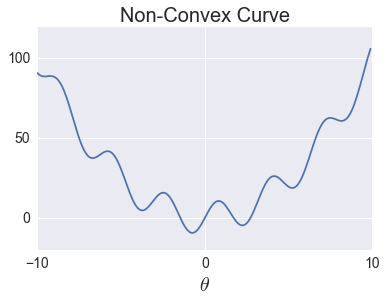

In [104]:
nonconvex = lambda x: x**2 + 10*np.sin(2*x)
x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(6, 4))
plt.plot(x, nonconvex(x))
plt.xlabel(r'$\theta$', fontsize=20)
plt.yticks([0, 50, 100], fontsize=14)
plt.xticks([-10, 0, 10], fontsize=14)
plt.title('Non-Convex Curve', fontsize=20)

plt.savefig(fp_fig + os.sep + 'logreg_eg4_sample_nonconvex_curve.pdf')

In [151]:
def cost_function(hypothesis_function, y):
    if y == 1:
        return -1 * np.log(hypothesis_function)
    elif y == 0:
        return -1 * np.log(1 - hypothesis_function)

In [152]:
x = np.arange(0, 1, 0.05)

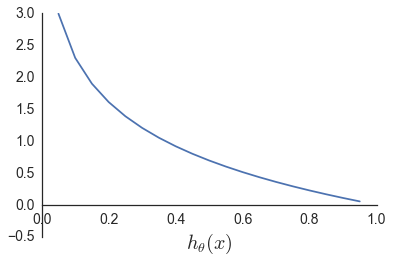

In [163]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.plot(x, cost_function(x, 1))

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylim(ymin=-0.5)
    plt.xlabel(r'$h_\theta (x)$', fontsize=20)

    plt.savefig(fp_fig + os.sep + 'logreg_eg5_cost_func_y1.pdf')

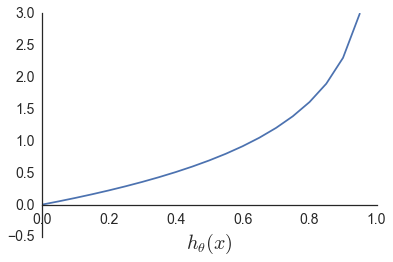

In [165]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.plot(x, cost_function(x, 0))

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylim(ymin=-0.5)
    plt.xlabel(r'$h_\theta (x)$', fontsize=20)

    plt.savefig(fp_fig + os.sep + 'logreg_eg5_cost_func_y0.pdf')

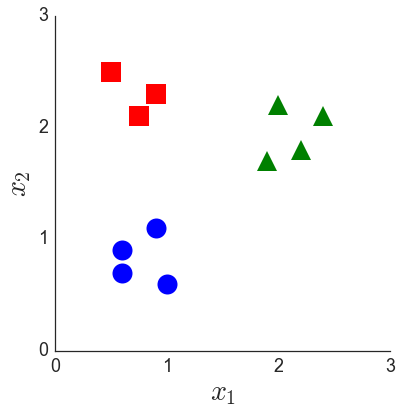

In [27]:
x1 = [0.6, 1, 0.6, 0.9]
y1 = [0.7, 0.6, 0.9, 1.1]

x2 = [2, 1.9, 2.4, 2.2]
y2 = [2.2, 1.7, 2.1, 1.8]

x3 = [0.75, 0.5, 0.9]
y3 = [2.1, 2.5, 2.3]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'bo', markersize=20)
    plt.plot(x2, y2, 'g^', markersize=20)
    plt.plot(x3, y3, 'rs', markersize=20)
    
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("$x_1$", fontsize=28)
    plt.ylabel('$x_2$', fontsize=28)
    plt.yticks([0, 1, 2, 3], fontsize=18)
    plt.xticks([0, 1, 2, 3], fontsize=18)
    plt.ylim(0, 3)
    plt.xlim(0, 3)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg6_multiclass_eg_data.pdf')

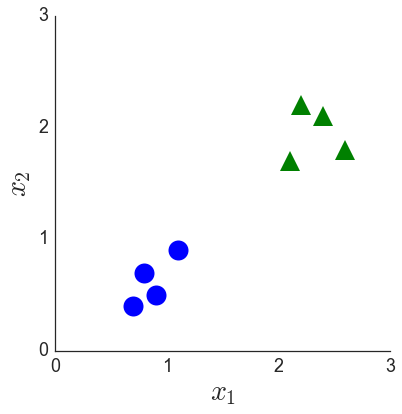

In [31]:
x1 = [0.7, 0.9, 0.8, 1.1]
y1 = [0.4, 0.5, 0.7, 0.9]

x2 = [2.2, 2.1, 2.4, 2.6]
y2 = [2.2, 1.7, 2.1, 1.8]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'bo', markersize=20)
    plt.plot(x2, y2, 'g^', markersize=20)
    
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("$x_1$", fontsize=28)
    plt.ylabel('$x_2$', fontsize=28)
    plt.yticks([0, 1, 2, 3], fontsize=18)
    plt.xticks([0, 1, 2, 3], fontsize=18)
    plt.ylim(0, 3)
    plt.xlim(0, 3)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg6_binary_eg_data.pdf')

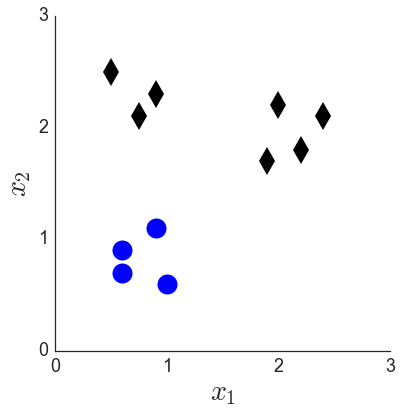

In [34]:
x1 = [0.6, 1, 0.6, 0.9]
y1 = [0.7, 0.6, 0.9, 1.1]

x2 = [2, 1.9, 2.4, 2.2]
y2 = [2.2, 1.7, 2.1, 1.8]

x3 = [0.75, 0.5, 0.9]
y3 = [2.1, 2.5, 2.3]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'bo', markersize=20)
    plt.plot(x2, y2, 'kd', markersize=20)
    plt.plot(x3, y3, 'kd', markersize=20)
    
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("$x_1$", fontsize=28)
    plt.ylabel('$x_2$', fontsize=28)
    plt.yticks([0, 1, 2, 3], fontsize=18)
    plt.xticks([0, 1, 2, 3], fontsize=18)
    plt.ylim(0, 3)
    plt.xlim(0, 3)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg6_multiclass_onevall_step1.pdf')

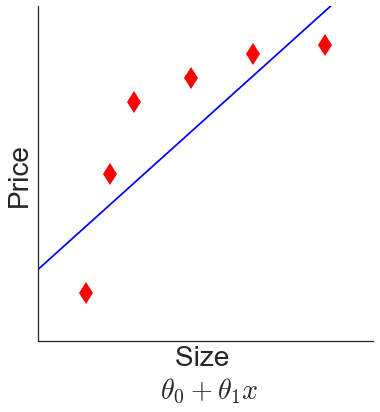

In [60]:
x1 = [1, 1.5, 2, 3.2, 4.5, 6]
y1 = [1, 3.5, 5, 5.5, 6, 6.2]

x2 = np.linspace(0, 7, 50)
fx = lambda x:0.9 * x + 1.5
y2 = [fx(x) for x in x2]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'rd', markersize=16)
    plt.plot(x2, y2, 'b-')
    
    plt.xlabel("Size \n $\\theta_0 + \\theta_1 x$", fontsize=28)
    plt.ylabel('Price', fontsize=28)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(0, 7)
    plt.xlim(0, 7)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg7_housing_data_linreg.pdf')

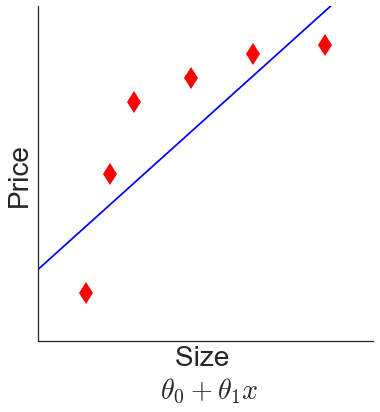

In [61]:
x1 = [1, 1.5, 2, 3.2, 4.5, 6]
y1 = [1, 3.5, 5, 5.5, 6, 6.2]

x2 = np.linspace(0, 7, 50)
fx = lambda x:0.9 * x + 1.5
y2 = [fx(x) for x in x2]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'rd', markersize=16)
    plt.plot(x2, y2, 'b-')
    
    plt.xlabel("Size \n $\\theta_0 + \\theta_1 x$", fontsize=28)
    plt.ylabel('Price', fontsize=28)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(0, 7)
    plt.xlim(0, 7)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg7_housing_data_linreg.pdf')

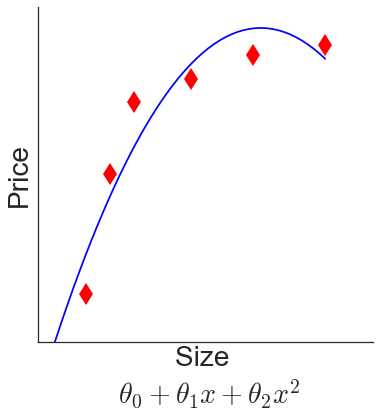

In [72]:
x1 = [1, 1.5, 2, 3.2, 4.5, 6]
y1 = [1, 3.5, 5, 5.5, 6, 6.2]

x2 = np.linspace(0, 6, 50)
fx = lambda x: -0.3545*x**2 + 3.2983*x - 1.1147
y2 = [fx(x) for x in x2]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'rd', markersize=16)
    plt.plot(x2, y2, 'b-')
    
    plt.xlabel("Size \n $\\theta_0 + \\theta_1 x + \\theta_2 x^2$", fontsize=28)
    plt.ylabel('Price', fontsize=28)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(0, 7)
    plt.xlim(0, 7)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg7_housing_data_quadreg.pdf')

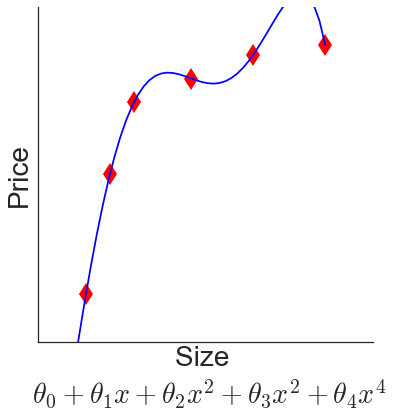

In [74]:
x1 = [1, 1.5, 2, 3.2, 4.5, 6]
y1 = [1, 3.5, 5, 5.5, 6, 6.2]

x2 = np.linspace(0, 6, 50)
fx = lambda x: -0.0394*x**5 + 0.5618*x**4 - 2.5949*x**3 + 3.356*x**2 + 4.8908*x - 5.1743
y2 = [fx(x) for x in x2]

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'rd', markersize=16)
    plt.plot(x2, y2, 'b-')
    
    plt.xlabel("Size \n $\\theta_0 + \\theta_1 x + \\theta_2 x^2 + \\theta_3x^2 + \\theta_4x^4$", fontsize=28)
    plt.ylabel('Price', fontsize=28)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(0, 7)
    plt.xlim(0, 7)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'logreg_eg7_housing_data_quadreg_overfit.pdf')